## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
MouseStudy_data = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
MouseStudy_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
EachMice = len(MouseStudy_data["Mouse ID"].unique())
print(EachMice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
MouseStudy_data["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
MouseStudy_data_dupl = MouseStudy_data.loc[MouseStudy_data["Mouse ID"]=="g989"]
MouseStudy_data_dupl

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_data = MouseStudy_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="last")
Cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
NumberOfMice = len(Cleaned_data["Mouse ID"].unique())
print(NumberOfMice)
Cleaned_data["Mouse ID"].value_counts()

249


k403    10
o287    10
j755    10
j984    10
k210    10
        ..
f932     1
v199     1
t573     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

DataPerDrugs = Cleaned_data.groupby(["Drug Regimen"])

TumourVolMean = DataPerDrugs["Tumor Volume (mm3)"].mean()
TumourVolMedian = DataPerDrugs["Tumor Volume (mm3)"].median()
TumourVolVar = DataPerDrugs["Tumor Volume (mm3)"].var()
TumourVolStd = DataPerDrugs["Tumor Volume (mm3)"].std()
TumourVolSem = DataPerDrugs["Tumor Volume (mm3)"].sem()

DrugsStatSummary = pd.DataFrame({"mean": TumourVolMean,"median": TumourVolMedian,"var": TumourVolVar,"std": TumourVolStd,"sem": TumourVolSem})
DrugsStatSummary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

DrugsStatSummaryAgg = DataPerDrugs["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
DrugsStatSummaryAgg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

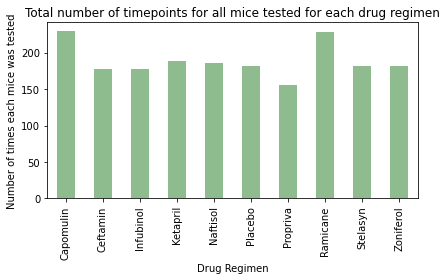

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
NumberofTimesTested = Cleaned_data.groupby("Drug Regimen")["Mouse ID"].count()

#print(NumberofTimesTested.sum()) - total 1888
NumberofTimesTested_BarChart = NumberofTimesTested.plot(kind="bar", title="Total number of timepoints for all mice tested for each drug regimen", color="darkseagreen")
NumberofTimesTested_BarChart.set_xlabel("Drug Regimen")
NumberofTimesTested_BarChart.set_ylabel("Number of times each mice was tested")
plt.tight_layout()

plt.show()

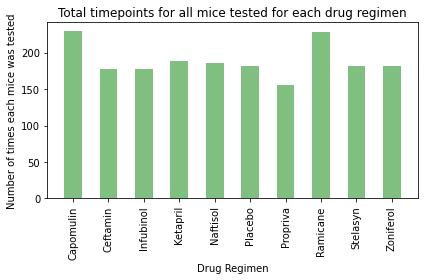

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
DrugsData = Cleaned_data.groupby("Drug Regimen")
DrugsCount = pd.DataFrame(DrugsData["Drug Regimen"].count())
#print(DrugsCount)

x_axis = np.arange(len(DrugsCount["Drug Regimen"]))
plt.bar(x_axis, NumberofTimesTested, color="green", alpha = 0.5, align = "center", width = 0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(DrugsCount.index), rotation="vertical")

plt.title("Total timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of times each mice was tested")

plt.tight_layout()
plt.show()

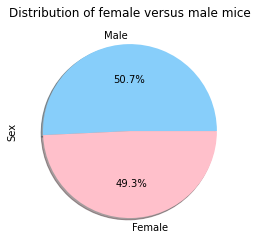

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
GenderData = pd.DataFrame(Cleaned_data["Sex"].value_counts())
colors = ["lightskyblue", "pink"]

GenderData_PieChart = GenderData.plot(kind="pie", y="Sex", title="Distribution of female versus male mice", colors=colors,autopct="%1.1f%%", shadow=True)
GenderData_PieChart.get_legend().remove()


Text(0, 0.5, 'Sex')

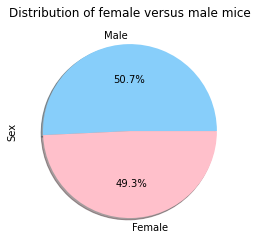

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_Data = list(GenderData.index.values)
Gender_Data_Count = GenderData["Sex"]
colors = ["lightskyblue", "pink"]

plt.pie(Gender_Data_Count, labels=Gender_Data, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
DrugsData = Cleaned_data[Cleaned_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

MaxTimePoint_data = pd.DataFrame(DrugsData.groupby("Mouse ID").max()["Timepoint"])
MaxTimePoint_data.reset_index().head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [14]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Merged_Data = pd.merge(MaxTimePoint_data,Cleaned_data, how="left",on=["Mouse ID", "Timepoint"])
Merged_Data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
DrugNames = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
TumorVolumeDataList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in DrugNames:
    #DOESNT MAKE SENSE WHY DO WE NEED TO MERGE THE DATA - WHAT FOR? AND MAY NEED TO FILTER
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    TumorVolumes = Merged_Data["Tumor Volume (mm3)"].loc[Merged_Data["Drug Regimen"] == drug]
    TumorVolumeDataList.append(TumorVolumes)
    
    quartiles = TumorVolumes.quantile([.25,.5,.75])
    lowerq = (quartiles[0.25]).round(2)
    upperq = (quartiles[0.75]).round(2)
    iqr = (upperq-lowerq).round(2)
    
    # Determine outliers using upper and lower bounds
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    outliers_count = (TumorVolumes.loc[(Merged_Data["Tumor Volume (mm3)"] >= upper_bound) | (Merged_Data["Tumor Volume (mm3)"] <= lower_bound)]).count()
    outliers_values = pd.Series(TumorVolumes.loc[(Merged_Data["Tumor Volume (mm3)"] >= upper_bound) | (Merged_Data["Tumor Volume (mm3)"] <= lower_bound)]).values
    
    print(f"{drug}'s data: ")
    print(f"For {drug}, Interquartile Range (IQR) is {iqr}.")
    print(f"For {drug} lower quartile is: {lowerq}")
    print(f"For {drug} upper quartile is: {upperq}")
    print(f"For {drug}, values below {lower_bound} is considered an outlier.")
    print(f"For {drug}, values above {upper_bound} is considered an outlier.")
    print(f"Number of {drug} outliers: {outliers_count}")
    print(f"For {drug}, potential outliers could be: {outliers_values}")
    print("-----------------------------")
    

Capomulin's data: 
For Capomulin, Interquartile Range (IQR) is 7.78.
For Capomulin lower quartile is: 32.38
For Capomulin upper quartile is: 40.16
For Capomulin, values below 20.71 is considered an outlier.
For Capomulin, values above 51.83 is considered an outlier.
Number of Capomulin outliers: 0
For Capomulin, potential outliers could be: []
-----------------------------
Ramicane's data: 
For Ramicane, Interquartile Range (IQR) is 9.1.
For Ramicane lower quartile is: 31.56
For Ramicane upper quartile is: 40.66
For Ramicane, values below 17.91 is considered an outlier.
For Ramicane, values above 54.31 is considered an outlier.
Number of Ramicane outliers: 0
For Ramicane, potential outliers could be: []
-----------------------------
Infubinol's data: 
For Infubinol, Interquartile Range (IQR) is 11.48.
For Infubinol lower quartile is: 54.05
For Infubinol upper quartile is: 65.53
For Infubinol, values below 36.83 is considered an outlier.
For Infubinol, values above 82.75 is considered a

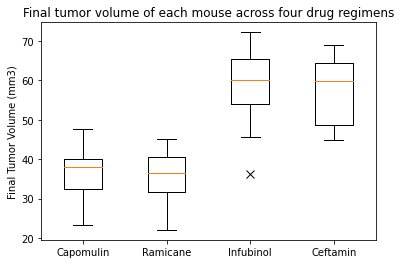

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='x', markerfacecolor="red", markersize=8, markeredgecolor="black")
plt.boxplot(TumorVolumeDataList, flierprops=flierprops)
plt.title("Final tumor volume of each mouse across four drug regimens")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], DrugNames)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

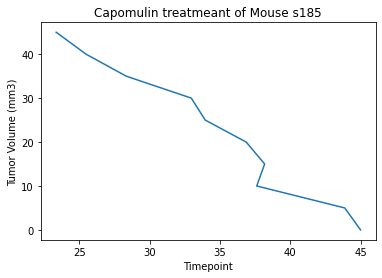

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Selected Mouse s185
Capomulin_Mice = Cleaned_data.loc[Cleaned_data["Drug Regimen"] == "Capomulin"]    
MouseS185_data = Capomulin_Mice.loc[Capomulin_Mice["Mouse ID"] == "s185",:]
plt.plot(MouseS185_data["Tumor Volume (mm3)"], MouseS185_data["Timepoint"])
plt.title("Capomulin treatmeant of Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0.5, 1.0, 'Average Tumor Volume vs Mouse Weight for Capomulin')

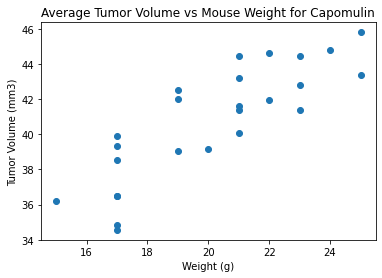

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
DataForMouse = Cleaned_data.loc[(Cleaned_data["Drug Regimen"] == "Capomulin")]
DataForMouseMean = DataForMouse.groupby(["Mouse ID"]).mean()
plt.scatter(DataForMouseMean["Weight (g)"],DataForMouseMean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin")

## Correlation and Regression

The correlation is 0.84
The r-squared is: 0.7088568047708723


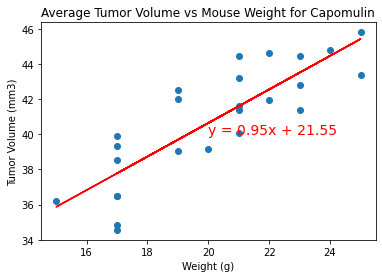

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Correlation = stats.pearsonr(DataForMouseMean["Weight (g)"],DataForMouseMean["Tumor Volume (mm3)"])[0]
print(f"The correlation is {round(Correlation,2)}")

x_values = DataForMouseMean["Weight (g)"]
y_values = DataForMouseMean["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(DataForMouseMean["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,40), color="red", fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin")
plt.annotate(line_eq,(0,50),fontsize=10,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
